### Can I use an API to pull comments from reddit?

In [1]:
import praw
import pandas as pd


In [2]:
client_id='EEazOlCYKtEVqtl_ojhALw'
secret='h41AuWZUqbGbLfjBptI3QkJ1pLFrJA'
user_agent='LCS Pull'

In [3]:
reddit = praw.Reddit(client_id=client_id, client_secret=secret, user_agent=user_agent)

In [4]:
posts = []
ml_subreddit = reddit.subreddit('leagueoflegends')
for post in ml_subreddit.hot():
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

# print(posts['id'])
lcs_posts=posts[posts['title'].str.contains('LCS') & posts['title'].str.contains('vs') & posts['title'].str.contains('Live')]
lcs_posts.reset_index(inplace=True)
lcs_posts['title']

0    FlyQuest vs Team Liquid / LCS 2024 Spring Play...
1    Cloud9 vs Team Liquid / LCS 2024 Spring Playof...
Name: title, dtype: object

In [5]:
lcs_posts['title'][1]

"Cloud9 vs Team Liquid / LCS 2024 Spring Playoffs - Losers' Bracket - Finals / Live Discussion"

In [15]:
import datetime

d=[]
for id in lcs_posts['id']:
    post_name=lcs_posts[lcs_posts['id']==id].title
    submission = reddit.submission(id=id)

    submission.comments.replace_more(limit=None)

    for comment in submission.comments.list():
        d.append(
            {
                'post_title':post_name.values,
                'ctrd':datetime.datetime.fromtimestamp(comment.created),
                'pstr':comment.author,
                'cmt':comment.body
            }
        )
    
    df=pd.DataFrame(d)


FlyQuest vs Team Liquid / LCS 2024 Spring Playoffs - Final / Live Discussion


TooManyRequests: received 429 HTTP response

In [19]:
df

,post_title,ctrd,pstr,cmt
0,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:44:10,Thundermelons,APA Ghosting off stage at top speed after ever...
1,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:44:11,Lost_Mountain2432,The really criminal thing about that game was ...
2,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:44:38,berniebadger84,Real glad to see Core back on form. He had a f...
3,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:43:23,berniebadger84,Yaptain America is fucking top tier.
4,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:11:57,PepaTK,This is actually so much more hype than C9 vs ...
...,...,...,...,...
562,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:22:49,HeavyNettle,Yes obviously but it's usually at least roughl...
563,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 17:02:55,aquawarrior21,"Content good right there, no matter what happens"
564,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 17:13:23,aquawarrior21,It’s a joke I’m sorry you hate fun
565,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:21:53,CoogiMonster,At least you have the courtesy to apologize fo...


### Utilizing logic below for Topic modeling

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [20]:
# Load the regular expression library
import re
# Remove punctuation
df['cmt_processed'] = \
df['cmt'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['cmt_processed'] = \
df['cmt_processed'].map(lambda x: x.lower())

0    apa ghosting off stage at top speed after ever...
1    the really criminal thing about that game was ...
2    real glad to see core back on form he had a fe...
3                  yaptain america is fucking top tier
4    this is actually so much more hype than c9 vs ...
Name: cmt_processed, dtype: object

In [21]:
df

,post_title,ctrd,pstr,cmt,cmt_processed
0,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:44:10,Thundermelons,APA Ghosting off stage at top speed after ever...,apa ghosting off stage at top speed after ever...
1,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:44:11,Lost_Mountain2432,The really criminal thing about that game was ...,the really criminal thing about that game was ...
2,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:44:38,berniebadger84,Real glad to see Core back on form. He had a f...,real glad to see core back on form he had a fe...
3,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:43:23,berniebadger84,Yaptain America is fucking top tier.,yaptain america is fucking top tier
4,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:11:57,PepaTK,This is actually so much more hype than C9 vs ...,this is actually so much more hype than c9 vs ...
...,...,...,...,...,...
562,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:22:49,HeavyNettle,Yes obviously but it's usually at least roughl...,yes obviously but it's usually at least roughl...
563,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 17:02:55,aquawarrior21,"Content good right there, no matter what happens",content good right there no matter what happens
564,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 17:13:23,aquawarrior21,It’s a joke I’m sorry you hate fun,it’s a joke i’m sorry you hate fun
565,FlyQuest vs Team Liquid / LCS 2024 Spring Play...,2024-03-31 16:21:53,CoogiMonster,At least you have the courtesy to apologize fo...,at least you have the courtesy to apologize fo...


In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
!python -m spacy download en_core_web_sm


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     --------------------------------------- 12.8/12.8 MB 50.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


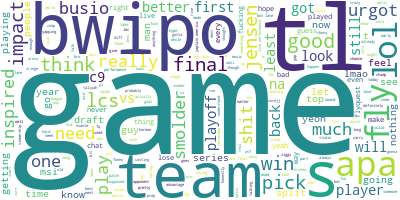

In [22]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['cmt_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [43]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.cmt_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_words=data_lemmatized

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['apa', 'ghosting', 'stage', 'top', 'speed', 'every', 'match', 'never', 'funny']


In [44]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [45]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"get" + 0.017*"lol" + 0.015*"play" + 0.015*"bwipo" + 0.012*"game" + '
  '0.012*"flyquest" + 0.010*"arena" + 0.010*"smolder" + 0.008*"final" + '
  '0.007*"pick"'),
 (1,
  '0.015*"live" + 0.014*"year" + 0.013*"player" + 0.012*"team" + '
  '0.011*"playoff" + 0.011*"performance" + 0.011*"tahm" + 0.010*"go" + '
  '0.009*"bwipo" + 0.009*"put"'),
 (2,
  '0.028*"game" + 0.015*"think" + 0.014*"tl" + 0.012*"look" + 0.011*"pick" + '
  '0.010*"give" + 0.010*"go" + 0.010*"yeon" + 0.008*"get" + 0.008*"lcs"'),
 (3,
  '0.017*"impact" + 0.015*"good" + 0.014*"fly" + 0.012*"get" + 0.011*"series" '
  '+ 0.011*"even" + 0.011*"play" + 0.010*"last" + 0.010*"look" + '
  '0.010*"playoff"'),
 (4,
  '0.022*"get" + 0.013*"impact" + 0.012*"lol" + 0.010*"pick" + 0.010*"team" + '
  '0.009*"split" + 0.008*"inspire" + 0.008*"go" + 0.008*"definitely" + '
  '0.008*"really"'),
 (5,
  '0.023*"get" + 0.018*"fly" + 0.018*"final" + 0.014*"play" + 0.014*"go" + '
  '0.012*"well" + 0.011*"game" + 0.009*"good" + 0.

In [46]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./test'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './test'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.007868 -0.058734       1        1  12.748983
6      0.117954  0.061658       2        1  12.656511
2     -0.034872  0.070308       3        1  11.633462
1     -0.127368  0.057153       4        1   9.933121
3     -0.068681 -0.055261       5        1   9.836673
8      0.020935  0.041133       6        1   9.279787
4      0.046810  0.010361       7        1   9.029265
7      0.023570 -0.120100       8        1   8.702367
0      0.023715 -0.015442       9        1   8.462492
9      0.005804  0.008924      10        1   7.717340, topic_info=       Term       Freq      Total Category  logprob  loglift
9      game  53.000000  53.000000  Default  30.0000  30.0000
34    bwipo  19.000000  19.000000  Default  29.0000  29.0000
44   impact  18.000000  18.000000  Default  28.0000  28.0000
49     make  13.000000  13.000000  Default  27.0000  27.0000
158     lol  21.000000  21.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
104    chat   1.443086   9.020165  Topic10  -5.2465   0.7290
103    well   1.443052  19.145141  Topic10  -5.2465  -0.0236
203     man   1.443048  10.375121  Topic10  -5.2465   0.5890
27    split   1.443038  11.658705  Topic10  -5.2465   0.4724
46     know   1.443034  12.230469  Topic10  -5.2465   0.4245

[714 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
743       5  0.657367    aaaaand
197      10  0.698640    ability
650       5  0.350635       able
650       7  0.350635       able
320       7  0.709444   absolute
...     ...       ...        ...
164       7  0.109290       yeon
675       2  0.450441  yesterday
675       8  0.225221  yesterday
675      10  0.225221  yesterday
1061      3  0.652060         없다

[1271 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 3, 2, 4, 9, 5, 8, 1, 10])

In [47]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.37599915704488734


In [48]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [50]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./test.csv', index=False)
    pbar.close()

  2%|▏         | 9/540 [00:34<34:09,  3.86s/it]


KeyboardInterrupt: 

In [52]:
num_topics = 8

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [53]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./test'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './test'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.068741 -0.032966       1        1  19.345086
3     -0.018998  0.025402       2        1  18.245732
6      0.014520  0.016557       3        1  17.287394
7      0.006991 -0.002563       4        1  12.556676
5      0.044125 -0.052320       5        1  11.435872
1      0.004371  0.022573       6        1   9.238299
2      0.011417  0.011105       7        1   6.834302
0      0.006315  0.012212       8        1   5.056640, topic_info=       Term       Freq      Total Category  logprob  loglift
900  spring   6.000000   6.000000  Default  30.0000  30.0000
260    talk  10.000000  10.000000  Default  29.0000  29.0000
40    final  10.000000  10.000000  Default  28.0000  28.0000
104    chat   5.000000   5.000000  Default  27.0000  27.0000
156     win  13.000000  13.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
40    final   1.006842  10.250703   Topic8  -5.1837   0.6639
370     say   0.904691   9.172429   Topic8  -5.2907   0.6681
128    take   0.746359   8.557671   Topic8  -5.4831   0.5451
10      get   0.754699  18.676863   Topic8  -5.4720  -0.2243
161    mean   0.746359   8.776572   Topic8  -5.4831   0.5198

[412 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
31        1  0.609900   actually
31        3  0.203300   actually
702       3  0.522986        add
1092      1  0.555036  admission
634       2  0.258030  advantage
...     ...       ...        ...
131       2  0.356914       year
131       3  0.118971       year
131       5  0.356914       year
675       3  0.477165  yesterday
675       4  0.238583  yesterday

[574 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 7, 8, 6, 2, 3, 1])

In [55]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.068741 -0.032966       1        1  19.345086
3     -0.018998  0.025402       2        1  18.245732
6      0.014520  0.016557       3        1  17.287394
7      0.006991 -0.002563       4        1  12.556676
5      0.044125 -0.052320       5        1  11.435872
1      0.004371  0.022573       6        1   9.238299
2      0.011417  0.011105       7        1   6.834302
0      0.006315  0.012212       8        1   5.056640, topic_info=       Term       Freq      Total Category  logprob  loglift
900  spring   6.000000   6.000000  Default  30.0000  30.0000
260    talk  10.000000  10.000000  Default  29.0000  29.0000
40    final  10.000000  10.000000  Default  28.0000  28.0000
104    chat   5.000000   5.000000  Default  27.0000  27.0000
156     win  13.000000  13.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
40    final   1.006842  10.250703   Topic8  -5.1837   0.6639
370     say   0.904691   9.172429   Topic8  -5.2907   0.6681
128    take   0.746359   8.557671   Topic8  -5.4831   0.5451
10      get   0.754699  18.676863   Topic8  -5.4720  -0.2243
161    mean   0.746359   8.776572   Topic8  -5.4831   0.5198

[412 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
31        1  0.609900   actually
31        3  0.203300   actually
702       3  0.522986        add
1092      1  0.555036  admission
634       2  0.258030  advantage
...     ...       ...        ...
131       2  0.356914       year
131       3  0.118971       year
131       5  0.356914       year
675       3  0.477165  yesterday
675       4  0.238583  yesterday

[574 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 7, 8, 6, 2, 3, 1])